In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
train_error_kn=[]
train_derr_kn=[]
test_derr_kn=[]
test_error_kn=[]
test_error_unk=[]
test_error_per=dict()
train_error_per=dict()
train_derr_per=dict()
test_derr_per=dict()

In [15]:
mean_recons=[]

In [16]:
#Enter the known numbers in increasing order to find the corresponding errors and plots
kno=[0,3,7,9]

In [17]:
#Loading the Saved Errors
prefix="Known"
prefixAE="KnownAE"
#to plot AE results use prefixAE
file=open(prefix+str(kno)+"train_error_kn.txt","r")
for line in file:
    for error in line.split():
        train_error_kn.append(np.float64(error))
file.close()
file=open("Known"+str(kno)+"test_error_kn.txt","r")
for line in file:
    for error in line.split():
        test_error_kn.append(error)
file.close()
file=open("Known"+str(kno)+"test_error_unk.txt","r")
for line in file:
    for error in line.split():
        test_error_unk.append(error)
file.close()
test_error_per=np.load("Known"+str(kno)+"test_error_per.npy",allow_pickle=True).item()
train_error_per=np.load("Known"+str(kno)+"train_error_per.npy",allow_pickle=True).item()

In [18]:
ctr=0
for i in test_error_unk:
    ctr=ctr+1
    if i == '[0.07225498557090759,':
        print(ctr)

In [19]:
for j in range(10):
    ctr=0
    for i in test_error_per[str(j)]:
        if type(i) == list:
            test_error_per[str(j)][ctr]=i[0]
        ctr=ctr+1

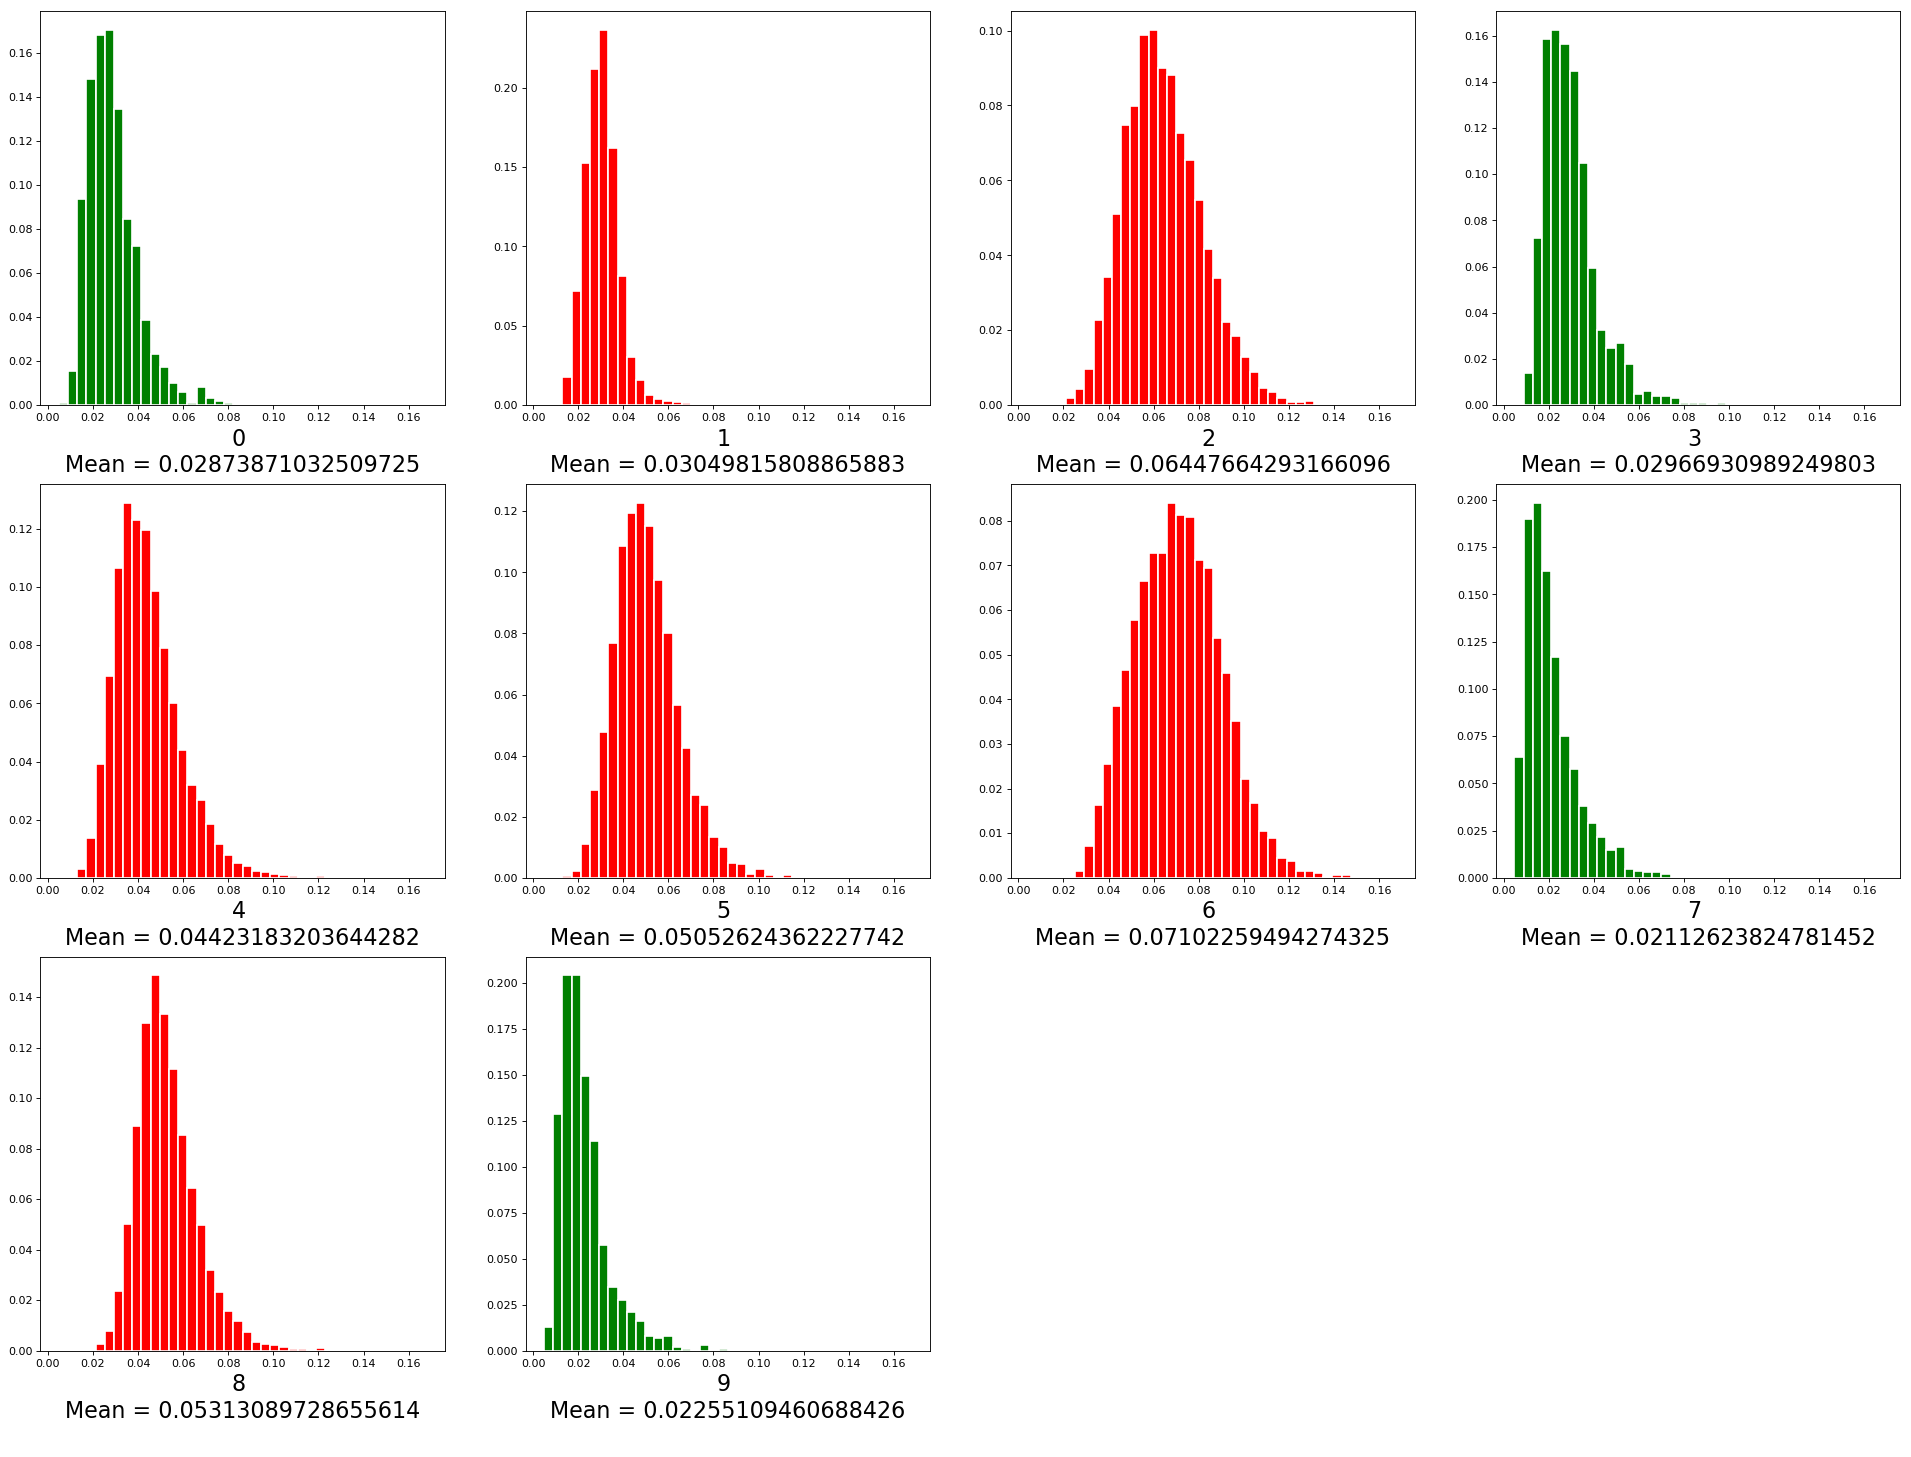

In [20]:
#Plotting the Histograms
fig4=plt.figure(figsize=(30,30),dpi=80)
tmp=[]
for i in range(10):
    tmp.append(test_error_per[str(i)])
tmp=tuple(tmp)
bins=np.histogram(np.hstack(tmp),bins=40)[1]
#ind=['1','2','3','4','6','7','8','9']
tmp=[]
for i in range(10):
    errors=test_error_per[str(i)]
    #errors=np.array(errors)
    ax=fig4.add_subplot(4,4,i+1)
    if i in kno :
        ax.hist(errors,bins,facecolor='green',edgecolor='white',linewidth=1.5,weights=np.ones_like(errors)/np.shape(errors)[0])
    else:
        ax.hist(errors,bins,facecolor='red',edgecolor='white',linewidth=1.5,weights=np.ones_like(errors)/np.shape(errors)[0])
    ax.set_xlabel(str(i)+" \nMean = " + str(np.mean(errors))+"\n",fontsize=20)
    tmp.append(np.mean(errors))
    ax.xaxis.label.set_size(20)
plt.show()       

In [21]:
mean_recons.append(tmp)

In [23]:
#To obtain the Combined Error Histograms
kner=[]
unker=[]
for i in kno:
    er=test_error_per[str(i)]
    for j in er:
        kner.append(j)
unk=[0,1,2,3,4,5,6,7,8,9]
for i in kno:
    if i in unk:
        unk.remove(i)
for i in unk:
    er=test_error_per[str(i)]
    for j in er:
        unker.append(j)
l=len(kner)
l1=len(unker)

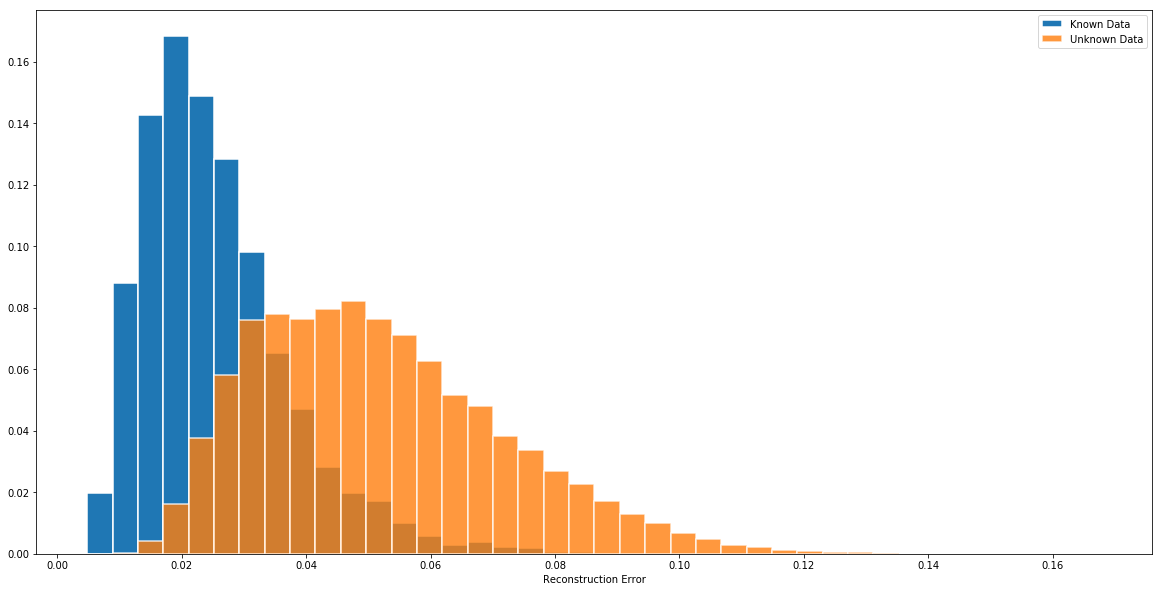

In [24]:
bins=np.histogram(np.hstack((kner,unker)),bins=40)[1]
plt.figure(figsize=(20,10))
plt.hist(kner,bins,edgecolor='white',linewidth=1.5,weights=np.ones_like(kner)/l,label="Known Data")
#plt.xlabel("Known Error")
plt.hist(unker,bins,edgecolor='white',linewidth=1.5,alpha=0.8,weights=np.ones_like(unker)/l1, label="Unknown Data")
plt.xlabel("Reconstruction Error")
plt.legend()
plt.show()